# Plots of Theoretical and Practical Running Time

In [28]:
# import statements
import csv, os, re

# for plots
import matplotlib
import matplotlib.pyplot as plt

import time

In [2]:
# data_combiner.py

# Helper function to check if a file is a CSV file
def is_csv_file(filename):
    return filename.endswith(".csv")


# Change your directory path as needed
data_directory = "data"
csv_files = sorted([f for f in os.listdir(data_directory) if is_csv_file(f)])

with open('all_reviews_content_only.csv', 'w', encoding='utf8') as f:
    for csvfile in csv_files:
        with open(os.path.join(data_directory, csvfile), 'r', encoding='utf8') as therealcsv:
            csvreader = csv.reader(x.replace('\0', '') for x in therealcsv)
            content_col = 0
            i = 0
            cur_row = []
            for row in csvreader:
                if i == 0 and len(row) == 0:
                    break
                elif i == 0:
                    content_col = row.index('content')
                else:
                    f.write('"' + row[content_col] + '"' + '\n')
                i += 1

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'

In [14]:
# giant_string.py (modified to generate different n)

string_files = [] # stores names

for i in range(20):
    string_files.append('one_giant_string' + str(i) + '.txt')
    with open('one_giant_string' + str(i) + '.txt', 'w', encoding='utf8') as f:
        counter = 0
        for csvfile in os.listdir('c:/Users/eehie/Desktop/UBC/COSC 320/COSC320-Project/data'):
            if counter < i*10000:
                with open('c:/Users/eehie/Desktop/UBC/COSC 320/COSC320-Project/data/' + csvfile, 'r', encoding='utf8') as therealcsv:
                    csvreader = csv.reader(x.replace('\0', '').replace('\r\n', '') for x in therealcsv)
                    content_col = 0
                    i = 0
                    cur_row = []
                    for row in csvreader:
                        if i == 0 and len(row) == 0:
                            break
                        elif i == 0:
                            content_col = row.index('content')
                        else:
                            f.write(re.sub(r'[\n\r\u2028\u2029]+', ' ', row[content_col] + ' '))
                        i += 1
            else:
                break
            counter += 1
        


In [37]:
# abbreviation_converter.py (modified to run through and plot different n)

nValues = []
tValues = []

# Step 1: Create a dictionary of abbreviations
abbreviations = {
    "WTH": "What The Hell",
    "ASAP": "As Soon As Possible",
    "BTW": "By The Way",
    "DIY": "Do It Yourself",
    "ETA": "Estimated Time of Arrival",
    "FYI": "For Your Information",
    "IDK": "I Don't Know",
    "IMO": "In My Opinion",
    "IMHO": "In My Humble Opinion",
    "OMW": "On My Way",
    "TTYL": "Talk To You Later",
    "WIP": "Work In Progress",
    "TY": "Thank You",
    "LMAO": "Laughing My A** Off",
    "LOL": "Laughing Out Loud",
    "ROFL": "Rolling On the Floor Laughing",
    "ICYMI": "In Case You Missed It",
    "TLDR": "Too Long Didn't Read",
    "TMI": "Too Much Information",
    "LMK": "Let Me Know",
    "NVM": "Nevermind",
    "FTW": "For The Win",
    "NP": "No Problem",
    "JK": "Just Kidding",
    "JW": "Just Wondering",
    "RN": "Right Now",
    "IRL": "In Real Life",
    "DAE": "Does Anyone Else",
    "GG": "Good Game",
    "SMG": "Shaking My Head",
    "NGL": "Not Gonna Lie",
    "IKR": "I Know Right",
    "WTF": "What The F***",
    "AA" : "Alcoholics Anonymous",
    "A.A." : "Alcoholics Anonymous",
    "IT'S" : "It is",
    "DOESN'T" : "Does Not",
    "THAT'S" : "That Is",
    "YOU'RE" : "You Are",
    "I'M" : "I Am"
}

# Step 2: Define a function to replace abbreviations in a line


def replace_abbreviations(line, abbrev_dict):
    pattern = re.compile(r'\b(?:' + '|'.join(re.escape(key)
                         for key in abbrev_dict.keys()) + r')\b')
    return pattern.sub(lambda x: abbrev_dict[x.group()], line)

st = time.time()
output_file = "converted_giant_string.txt"

for i in range(len(string_files)):
    # Read the input and process it all line by line
    with open(string_files[i], 'r', encoding='utf-8') as infile:
        with open(output_file, 'w', encoding='utf-8') as outfile:
            for line in infile:
                # Replace abbreviations in the current line
                converted_line = replace_abbreviations(line, abbreviations)
                # Write the converted line to the output file
                outfile.write(converted_line)
    ft = time.time()
    running_time = ft - st
    print("Conversion completed.")
    print("Practical Running Time in Seconds: ", running_time)
    nValues.append(i*10000)
    tValues.append(running_time)



Conversion completed.
Practical Running Time in Seconds:  0.0009982585906982422
Conversion completed.
Practical Running Time in Seconds:  0.17304348945617676
Conversion completed.
Practical Running Time in Seconds:  0.36552906036376953
Conversion completed.
Practical Running Time in Seconds:  0.540076732635498
Conversion completed.
Practical Running Time in Seconds:  0.7245838642120361
Conversion completed.
Practical Running Time in Seconds:  0.8906455039978027
Conversion completed.
Practical Running Time in Seconds:  1.0591957569122314
Conversion completed.
Practical Running Time in Seconds:  1.23024320602417
Conversion completed.
Practical Running Time in Seconds:  1.4077680110931396
Conversion completed.
Practical Running Time in Seconds:  1.580812931060791
Conversion completed.
Practical Running Time in Seconds:  1.843616247177124
Conversion completed.
Practical Running Time in Seconds:  2.035104274749756
Conversion completed.
Practical Running Time in Seconds:  2.210667371749878
C

Text(0.5, 1.0, 'Actual Running Time')

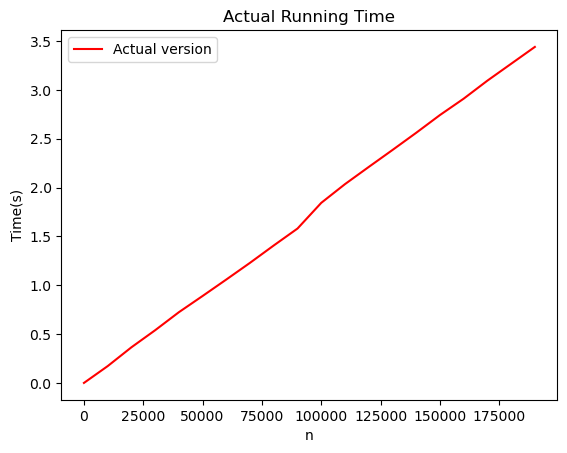

In [38]:
## practical plot
'''
theoretical_running_times = pd.DataFrame.from_dict(seconds_of_running_time)
sns.lineplot(data=theoretical_running_times, x = 'n', y = 'Running Time').set(title = "Practical Running Time of Implementation 1", ylabel = "Running Time (s)")

n = theoretical
linear_data = 
sns.lineplot(data=linear_data, x = 'n', y = 'Running Time')
'''

plt.plot(nValues, tValues, color='red', label="Actual version")

plt.xlabel("n")
plt.ylabel("Time(s)")
plt.legend()
plt.title("Actual Running Time")

Text(0.5, 1.0, 'Theoretical Running Time')

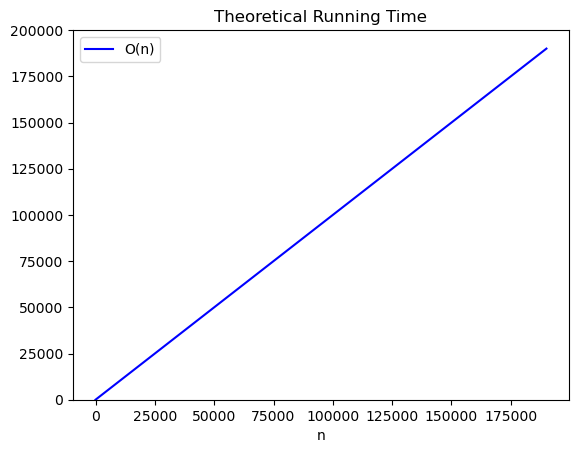

In [40]:
## theoretical plot

plt.plot(nValues, nValues, color='blue', label="O(n)")

plt.xlabel("n")
plt.ylim(0, 200000)
plt.legend()
plt.title("Theoretical Running Time")